Types of Transformers Model


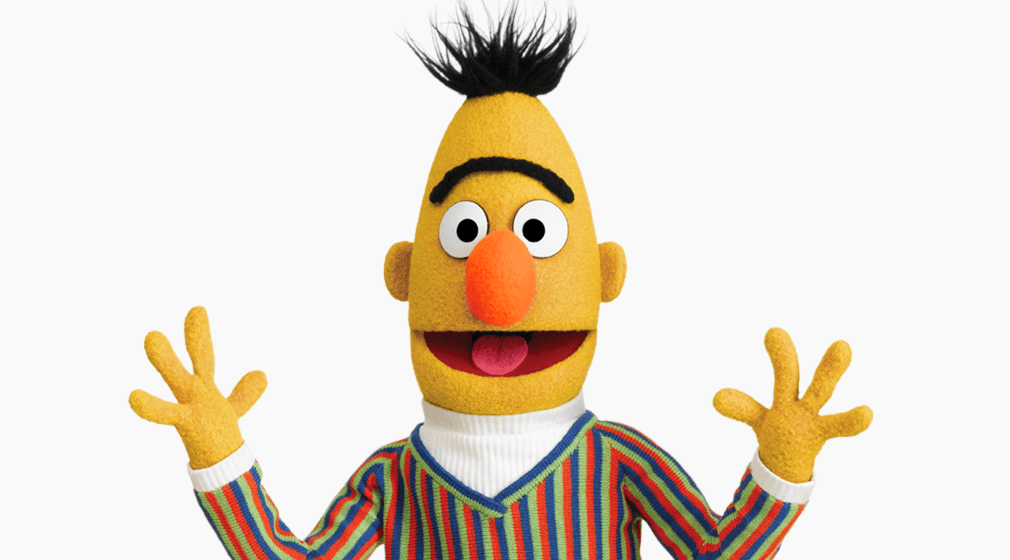


BERT

**Bidirectional**: Reads the text both from L->R as well as R->L

**Encoder**: Built on encoders

**Representations**: Transform text into meanigful numbers

And its based on **transformers** architecture

Whats the main objective of bert:

To simply understand and create meanigful representation of text, as they lack decoder they cant't used to generate text.

What do they use to understand the context and relation between words??
Self Attention

Pre-training of BERT:

MLM (Random words masked-> bert had to fig out what is the word)

NSP (Check if the 2nd sentence is a follow up of the 1st one)





---



Task:

Text Classification

NER (Named Entity Recognition)

Q&A (Finding Answer witin a context)

Sematic Simalirity


---




Bert base (110 M)
Bert large (340 M)
Roberta (You will learn this later)

Q&A with context

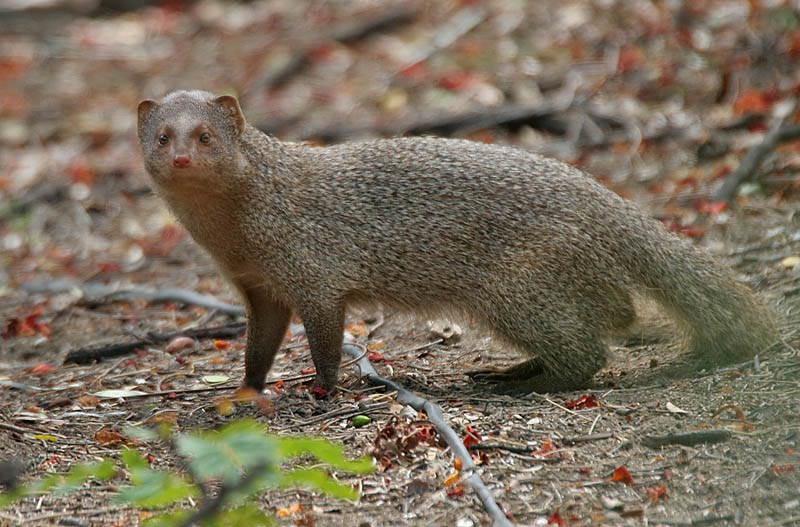

Context: The grey mongoose inhabits open forests, scrublands and cultivated fields, often close to human habitation. It lives in burrows, hedgerows and thickets, among groves of trees, and takes shelter under rocks or bushes and even in drains. It is bold and inquisitive but wary, seldom venturing far from cover. It is an excellent climber and usually lives singly or in pairs. Its prey includes rodents, snakes, birds’ eggs and hatchlings, lizards and a variety of invertebrates. Along the Chambal River it occasionally feeds on gharial eggs. It breeds throughout the year.

In [1]:
pip install transformers

In [2]:
import torch
from transformers import(
    BertForQuestionAnswering,
    BertTokenizerFast,
)
import pandas as pd
import numpy as np

In [3]:
context="The grey mongoose inhabits open forests, scrublands and cultivated fields, often close to human habitation. It lives in burrows, hedgerows and thickets, among groves of trees, and takes shelter under rocks or bushes and even in drains. It is bold and inquisitive but wary, seldom venturing far from cover. It is an excellent climber and usually lives singly or in pairs. Its prey includes rodents, snakes, birds’ eggs and hatchlings, lizards and a variety of invertebrates. Along the Chambal River it occasionally feeds on gharial eggs. It breeds throughout the year."

In [4]:
Question="Where can we find mangoose feeding on gharial eggs, also do they live in pairs"

In [5]:
model_name='deepset/bert-base-cased-squad2'

In [6]:
tokenizer=BertTokenizerFast.from_pretrained(model_name)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/152 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/508 [00:00<?, ?B/s]

In [7]:
model=BertForQuestionAnswering.from_pretrained(model_name)

model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

Some weights of the model checkpoint at deepset/bert-base-cased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [8]:
inputs= tokenizer(Question,context,return_tensors='pt')

In [9]:
inputs

{'input_ids': tensor([[  101,  2777,  1169,  1195,  1525,  1299,  2758,  6787,  8453,  1113,
           176, 16234,  1348,  6471,   117,  1145,  1202,  1152,  1686,  1107,
          7608,   102,  1109,  5583, 19863,  2758,  6787, 23778,  1116,  1501,
          5775,   117, 20712,  6754,  1105, 13783,  3872,   117,  1510,  1601,
          1106,  1769,  6296,  1988,   119,  1135,  2491,  1107,   171,  2149,
         20876,   117, 21610, 20876,  1105,  3528,  6248,   117,  1621, 28011,
          1116,  1104,  2863,   117,  1105,  2274,  7890,  1223,  5753,  1137,
         15479,  1105,  1256,  1107, 20681,   119,  1135,  1110,  9009,  1105,
          1107, 27110,  8588,  1133, 16970,   117, 17336, 21828,  6660,  1677,
          1121,  2267,   119,  1135,  1110,  1126,  6548,  6767,  1200,  1105,
          1932,  2491,  6928,  1193,  1137,  1107,  7608,   119,  2098,  8368,
          2075,  8335,  5240,   117, 14986,   117,  4939,   787,  6471,  1105,
         15524, 11082,   117, 20730,  

In [10]:
with torch.no_grad():
  outputs=model(**inputs)
outputs

QuestionAnsweringModelOutput(loss=None, start_logits=tensor([[ 0.9919, -7.9611, -8.1527, -7.4520, -7.7117, -6.5883, -7.9340, -9.3020,
         -7.9406, -8.3519, -7.5448, -8.4449, -8.9926, -8.9936, -9.1693, -8.2917,
         -8.1907, -7.6836, -7.2597, -8.0717, -8.6967, -8.6680, -7.6615, -4.6658,
         -4.5295, -6.0652, -6.7339, -7.6671, -8.8903, -7.2111, -6.6528, -8.9910,
         -7.5714, -8.0527, -8.7163, -7.2594, -7.5401, -9.0620, -6.4142, -7.1802,
         -8.8971, -7.4784, -7.6435, -8.9560, -8.5853, -5.1284, -7.1360, -7.8360,
         -6.0061, -8.5511, -8.6733, -9.1797, -7.3366, -8.8618, -8.9783, -8.0599,
         -8.4489, -9.2561, -7.2519, -6.7849, -9.0694, -8.8067, -7.3443, -9.5902,
         -8.3677, -7.5471, -7.0832, -7.7337, -7.2145, -8.9676, -8.0166, -9.0886,
         -8.8211, -8.3603, -6.3266, -8.1135, -3.9105, -7.7152, -6.6662, -8.7986,
         -6.5731, -8.6233, -8.5830, -8.2356, -6.3101, -7.8759, -4.3076, -8.3117,
         -9.1921, -8.4123, -8.9854, -8.2932, -7.2892, -1

Extractive Approach: We take a span of tokens to answer

In [11]:
from scipy.special import softmax
start_scores,end_scores=softmax(outputs.start_logits)[0],softmax(outputs.end_logits)

Softmax Function: The softmax function is used to convert the logits (raw scores) into probabilities. This helps in identifying the most likely positions for the start and end of the answer.

Start and End Scores: start_scores and end_scores represent the probabilities for each token in the context being the start and end of the answer, respectively.

In [12]:
start_scores

array([1.84287414e-01, 2.38369721e-05, 1.96802594e-05, 3.96588039e-05,
       3.05905305e-05, 9.40741666e-05, 2.44925941e-05, 6.23628785e-06,
       2.43308405e-05, 1.61266871e-05, 3.61469611e-05, 1.46944431e-05,
       8.49767275e-06, 8.48900527e-06, 7.12108567e-06, 1.71262964e-05,
       1.89464008e-05, 3.14617973e-05, 4.80702474e-05, 2.13407075e-05,
       1.14231298e-05, 1.17557447e-05, 3.21647422e-05, 6.43252220e-04,
       7.37214868e-04, 1.58719806e-04, 8.13228398e-05, 3.19834762e-05,
       9.41293092e-06, 5.04639247e-05, 8.81970991e-05, 8.51126606e-06,
       3.51960189e-05, 2.17520283e-05, 1.12021644e-05, 4.80868439e-05,
       3.63154431e-05, 7.92753235e-06, 1.11959343e-04, 5.20467620e-05,
       9.34932996e-06, 3.86267020e-05, 3.27482157e-05, 8.81389587e-06,
       1.27698349e-05, 4.05049475e-04, 5.43980968e-05, 2.70137134e-05,
       1.68382598e-04, 1.32137338e-05, 1.16939673e-05, 7.04711647e-06,
       4.45137957e-05, 9.68488894e-06, 8.62015622e-06, 2.15956206e-05,
      

In [13]:
start_idx=np.argmax(start_scores)
end_idx=np.argmax(end_scores)

In [14]:
answer_ids= inputs.input_ids[0][start_idx: end_idx + 1]
answer_ids

tensor([24705, 10806,  1233,  1595])

In [15]:
answer_tokens= tokenizer.convert_ids_to_tokens(answer_ids)
answer_tokens

['Cha', '##mba', '##l', 'River']

In [16]:
answer=tokenizer.convert_tokens_to_string(answer_tokens)
answer

'Chambal River'

**ಥ_ಥ  (GUYS we can make use of pipeline)**

In [17]:
from transformers import pipeline

# Load the Q&A pipeline using a pre-trained model
qa_pipeline = pipeline("question-answering", model="deepset/bert-base-cased-squad2")

# Get the answer from the model
result = qa_pipeline(question=Question, context=context)

# Print the result
print(f"Answer: {result['answer']}")

Some weights of the model checkpoint at deepset/bert-base-cased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


Answer: Chambal River


In [18]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForQuestionAnswering  #NOTE this is a generic approach we can make use of tokenizers mentioned above

tokenizer = AutoTokenizer.from_pretrained("deepset/bert-base-cased-squad2")
model = AutoModelForQuestionAnswering.from_pretrained("deepset/bert-base-cased-squad2")
inputs = tokenizer(Question, context, return_tensors="pt")

# Get start and end logits
with torch.no_grad():
    outputs = model(**inputs)

start_idx = torch.argmax(outputs.start_logits)
end_idx = torch.argmax(outputs.end_logits)

# Decode the answer
answer_tokens = inputs['input_ids'][0][start_idx:end_idx + 1]
answer = tokenizer.decode(answer_tokens, skip_special_tokens=True)

print(f"Answer: {answer}")

Some weights of the model checkpoint at deepset/bert-base-cased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Answer: Chambal River


**GPT**

Generative

Pre-Trained

Transformers

Focus: Is to generate human like text

Used: To predict words and generate coherent sentences(sentence which make sense).



---


Main Goal: To generate coherent and context relevant text
Architecture: Only consist of stacked decoder with self attention mechanism
Unlike bert it contains only decoder, and is unidirectional uses the context present in the left to generate text.




---

During pre-training the objectives were:
Predict next word based on previous context

Task:
Text Generation
Transalation
Summarization


Gpt1 (120 M) Gpt2 (1500 M) Gpt3(17500M) Gpt4(10000000 M)

Distill lighter gpt and openAI codex


In [19]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")
input_text = "The grey mongoose inhabits open forests, scrublands and cultivated fields, often close to human habitation. It lives in burrows, hedgerows and thickets, among groves of trees, and takes shelter under rocks or bushes and even in drains. It is bold and inquisitive but wary, seldom venturing far from cover. It is an excellent climber and usually lives singly or in pairs. Its prey includes rodents, snakes, birds’ eggs and hatchlings, lizards and a variety of invertebrates. Along the Chambal River it occasionally feeds on gharial eggs. It breeds throughout the year."
inputs = tokenizer.encode(input_text, return_tensors="pt")
summary_ids = model.generate(inputs)

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


In [20]:
summary_ids

tensor([[  464, 13791,   285, 25162,   577, 11381,   896,  1280, 17039,    11,
         27268,  4447,   290, 30499,  7032,    11,  1690,  1969,   284,  1692,
          7947,   341,    13,   632,  3160,   287,  4356,  8516,    11, 16418,
          1362,  1666,   290,  6546,  1039,    11,  1871,  7128,  1158,   286,
          7150,    11,   290,  2753, 11772,   739, 12586,   393, 37413,   290,
           772,   287, 44368,    13,   632,   318, 10758,   290,  7949,   271,
          1800,   475, 23300,    11, 25129,  7435,   870,  1290,   422,  3002,
            13,   632,   318,   281,  6275,  5424,   527,   290,  3221,  3160,
          1702,   306,   393,   287, 14729,    13,  6363, 15974,  3407, 41093,
            11, 26042,    11, 10087,   447,   247,  9653,   290, 25834, 17783,
            11,   300, 14124,   290,   257,  4996,   286, 40631,   660, 44835,
            13, 17159,   262,   609,  4131,   282,  5866,   340, 10491, 21318,
           319,   308,  9869,   498,  9653,    13,  

In [21]:
summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
print(summary)

The grey mongoose inhabits open forests, scrublands and cultivated fields, often close to human habitation. It lives in burrows, hedgerows and thickets, among groves of trees, and takes shelter under rocks or bushes and even in drains. It is bold and inquisitive but wary, seldom venturing far from cover. It is an excellent climber and usually lives singly or in pairs. Its prey includes rodents, snakes, birds’ eggs and hatchlings, lizards and a variety of invertebrates. Along the Chambal River it occasionally feeds on gharial eggs. It breeds throughout the year.

The grey mongoose is a common sight in the Chambal River, but it


In [22]:
# Part 1: Environment Setup

# Install necessary libraries
!pip install transformers torch pandas numpy -q

# Import libraries
import torch
from transformers import (
    AutoModelForCausalLM, AutoTokenizer,
    AutoModelForSeq2SeqLM, pipeline
)
import pandas as pd
import numpy as np

# Check GPU availability
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")


Using device: cpu


In [23]:
# Part 2: Task Definitions

# Define the tasks as a dictionary for easy iteration
tasks = {
    "Task 1: Scientific Explanation": {
        "prompt": (
            "Explain the greenhouse effect and its impact on climate change. "
            "Include: the basic mechanism of the greenhouse effect, key greenhouse gases and their sources, "
            "global implications, and potential solutions."
        ),
        "word_limit": (250, 300)  # Min and Max word limit
    },
    "Task 2: Literary Analysis": {
        "prompt": (
            "Analyze the themes of power and corruption in George Orwell's 'Animal Farm'. "
            "Include: three major symbolic representations, how power dynamics evolve throughout the story, "
            "parallels to historical events, and relevance to modern society."
        ),
        "word_limit": (300, 350)
    },
    "Task 3: Ethical Dilemma": {
        "prompt": (
            "A self-driving car must make a split-second decision: "
            "1. Swerve left and hit an elderly couple. "
            "2. Swerve right and hit a group of school children. "
            "3. Continue straight and hit a single adult. "
            "Analyze this ethical dilemma considering moral frameworks, programming implications for AI, "
            "legal and societal implications, and propose a solution with justification."
        ),
        "word_limit": (350, 400)
    },
    "Task 4: Business Case Analysis": {
        "prompt": (
            "A major retail company is facing declining sales due to e-commerce competition. "
            "Develop a comprehensive strategy addressing digital transformation initiatives, "
            "customer experience enhancement, supply chain optimization, employee training and adaptation, "
            "and financial implications and ROI."
        ),
        "word_limit": (300, 350)
    },
    "Task 5: Historical Analysis": {
        "prompt": (
            "Compare and contrast the Industrial Revolution and the Digital Revolution. "
            "Include major technological innovations, societal impacts, economic transformations, "
            "environmental consequences, and future implications."
        ),
        "word_limit": (350, 400)
    }
}

# Print task details
for task, details in tasks.items():
    print(f"{task}:\nPrompt: {details['prompt']}\nWord Limit: {details['word_limit']}\n")


Task 1: Scientific Explanation:
Prompt: Explain the greenhouse effect and its impact on climate change. Include: the basic mechanism of the greenhouse effect, key greenhouse gases and their sources, global implications, and potential solutions.
Word Limit: (250, 300)

Task 2: Literary Analysis:
Prompt: Analyze the themes of power and corruption in George Orwell's 'Animal Farm'. Include: three major symbolic representations, how power dynamics evolve throughout the story, parallels to historical events, and relevance to modern society.
Word Limit: (300, 350)

Task 3: Ethical Dilemma:
Prompt: A self-driving car must make a split-second decision: 1. Swerve left and hit an elderly couple. 2. Swerve right and hit a group of school children. 3. Continue straight and hit a single adult. Analyze this ethical dilemma considering moral frameworks, programming implications for AI, legal and societal implications, and propose a solution with justification.
Word Limit: (350, 400)

Task 4: Business 

In [24]:
# Part 3: Model Loading

# Define the models and tokenizers to load
# Part 3: Model Loading

# Define the models and tokenizers to load
models = {
    "BERT": {
        "model_name": "bert-base-uncased",
        "task": "question-answering"
    },
    "RoBERTa": {
        "model_name": "roberta-base",
        "task": "fill-mask"
    },
    "BART": {
        "model_name": "facebook/bart-large-cnn",
        "task": "summarization"
    },
    "GPT": {
        "model_name": "gpt2",
        "task": "text-generation"
    }
}
# ... (Rest of the code remains the same)

# Load models and tokenizers
loaded_models = {}
for model_name, details in models.items():
    print(f"Loading {model_name} model...")
    model = AutoModelForCausalLM.from_pretrained(details["model_name"]).to(device)
    tokenizer = AutoTokenizer.from_pretrained(details["model_name"])
    loaded_models[model_name] = {"model": model, "tokenizer": tokenizer}
    print(f"{model_name} loaded successfully!")

# Print loaded models
for model_name in loaded_models:
    print(f"{model_name}: {models[model_name]['model_name']} loaded")


Loading BERT model...


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

If you want to use `BertLMHeadModel` as a standalone, add `is_decoder=True.`


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

BERT loaded successfully!
Loading RoBERTa model...


config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

If you want to use `RobertaLMHeadModel` as a standalone, add `is_decoder=True.`


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

RoBERTa loaded successfully!
Loading BART model...


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

BART loaded successfully!
Loading GPT model...
GPT loaded successfully!
BERT: bert-base-uncased loaded
RoBERTa: roberta-base loaded
BART: facebook/bart-large-cnn loaded
GPT: gpt2 loaded


In [27]:
def generate_response(task_prompt, model, tokenizer, task_type, min_words=250, max_words=300, max_length=512):
    try:
        if task_type == "text-generation":
            return text_generation_response(task_prompt, model, tokenizer, min_words, max_words, max_length)
        elif task_type == "summarization":
            return summarization_response(task_prompt, model, tokenizer, max_length)
        elif task_type == "fill-mask":
            return fill_mask_response(task_prompt, model, tokenizer)
        else:
            return "Unsupported task type or implementation pending."
    except Exception as e:
        return f"Error generating response: {e}"


def text_generation_response(prompt, model, tokenizer, min_words, max_words, max_length):
    inputs = tokenizer.encode(prompt, return_tensors="pt").to(device)
    outputs = model.generate(inputs, max_length=max_length, num_return_sequences=1, temperature=0.7)
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)

    words = response.split()
    while len(words) < min_words:
        additional_outputs = model.generate(inputs, max_length=max_length + 50, temperature=0.7)
        response += " " + tokenizer.decode(additional_outputs[0], skip_special_tokens=True)
        words = response.split()

    return " ".join(words[:max_words])


def summarization_response(prompt, model, tokenizer, max_length):
    inputs = tokenizer.encode(prompt, return_tensors="pt", max_length=1024, truncation=True).to(device)
    outputs = model.generate(inputs, max_length=max_length, min_length=50, length_penalty=2.0, num_beams=4)
    return tokenizer.decode(outputs[0], skip_special_tokens=True)


def fill_mask_response(prompt, model, tokenizer):
    if "[MASK]" not in prompt:
        return "No [MASK] token found in the input prompt."

    inputs = tokenizer(prompt.replace("[MASK]", tokenizer.mask_token), return_tensors="pt").to(device)
    mask_token_ids = (inputs.input_ids == tokenizer.mask_token_id).nonzero(as_tuple=True)[1]

    if mask_token_ids.size(0) == 0:
        return "No mask token found in the tokenized input."

    mask_index = mask_token_ids.item()
    predictions = model(**inputs)
    predicted_token_id = predictions.logits[0, mask_index].argmax(dim=-1)
    return tokenizer.decode(predicted_token_id)


# Generating responses
model_outputs = {}
for task_name, task_details in tasks.items():
    print(f"\nGenerating responses for: {task_name}")
    task_prompt = task_details["prompt"]
    model_outputs[task_name] = {}

    for model_name, model_data in loaded_models.items():
        print(f"Processing with {model_name}...")
        model = model_data["model"]
        tokenizer = model_data["tokenizer"]
        task_type = models[model_name]["task"]
        response = generate_response(task_prompt, model, tokenizer, task_type)
        model_outputs[task_name][model_name] = response
        print(f"{model_name} response generated.")

# Example Output
for task, responses in model_outputs.items():
    print(f"\nExample Outputs for {task}:")
    for model_name, response in responses.items():
        print(f"{model_name} Output: {response[:300]}...\n")  # Truncated for readability



Generating responses for: Task 1: Scientific Explanation
Processing with BERT...
BERT response generated.
Processing with RoBERTa...
RoBERTa response generated.
Processing with BART...


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


BART response generated.
Processing with GPT...
GPT response generated.

Generating responses for: Task 2: Literary Analysis
Processing with BERT...
BERT response generated.
Processing with RoBERTa...
RoBERTa response generated.
Processing with BART...


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


BART response generated.
Processing with GPT...
GPT response generated.

Generating responses for: Task 3: Ethical Dilemma
Processing with BERT...
BERT response generated.
Processing with RoBERTa...
RoBERTa response generated.
Processing with BART...


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


BART response generated.
Processing with GPT...
GPT response generated.

Generating responses for: Task 4: Business Case Analysis
Processing with BERT...
BERT response generated.
Processing with RoBERTa...
RoBERTa response generated.
Processing with BART...


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


BART response generated.
Processing with GPT...
GPT response generated.

Generating responses for: Task 5: Historical Analysis
Processing with BERT...
BERT response generated.
Processing with RoBERTa...
RoBERTa response generated.
Processing with BART...


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


BART response generated.
Processing with GPT...
GPT response generated.

Example Outputs for Task 1: Scientific Explanation:
BERT Output: Unsupported task type or implementation pending....

RoBERTa Output: No [MASK] token found in the input prompt....

BART Output: Explain the greenhouse effect and its impact on climate change. Include: the basic mechanism of the greenhouse effect, key greenhouse gases and their sources, global implications, and potential solutions. only only only still only only one only only had only onlyo only only is only only- only only w...

GPT Output: Explain the greenhouse effect and its impact on climate change. Include: the basic mechanism of the greenhouse effect, key greenhouse gases and their sources, global implications, and potential solutions. The greenhouse effect is a complex and complex issue. It is not a simple matter of how much car...


Example Outputs for Task 2: Literary Analysis:
BERT Output: Unsupported task type or implementation pending...

In [29]:
pip install textstat


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.9 MB/s eta 0:00:00


In [33]:
from collections import Counter
import re
from textstat import flesch_reading_ease

def calculate_metrics(response):
    response_length = len(response.split())
    words = response.split()
    unique_words = set(words)
    vocabulary_diversity = len(unique_words) / response_length if response_length > 0 else 0
    readability_score = flesch_reading_ease(response)
    return {
        "length": response_length,
        "vocab_diversity": vocabulary_diversity,
        "readability_score": readability_score
    }

evaluation_results = {}
for task, responses in model_outputs.items():
    evaluation_results[task] = {}
    for model_name, response in responses.items():
        metrics = calculate_metrics(response)
        evaluation_results[task][model_name] = metrics

for task, models in evaluation_results.items():
    for model_name, metrics in models.items():
        print(f"{model_name} - Length: {metrics['length']}, Vocab Diversity: {metrics['vocab_diversity']:.3f}, Readability: {metrics['readability_score']:.2f}")


BERT - Length: 6, Vocab Diversity: 1.000, Readability: 6.17
RoBERTa - Length: 8, Vocab Diversity: 1.000, Readability: 88.74
BART - Length: 477, Vocab Diversity: 0.252, Readability: -86.87
GPT - Length: 300, Vocab Diversity: 0.133, Readability: 65.42
BERT - Length: 6, Vocab Diversity: 1.000, Readability: 6.17
RoBERTa - Length: 8, Vocab Diversity: 1.000, Readability: 88.74
BART - Length: 484, Vocab Diversity: 0.110, Readability: -56.08
GPT - Length: 300, Vocab Diversity: 0.127, Readability: 70.39
BERT - Length: 6, Vocab Diversity: 1.000, Readability: 6.17
RoBERTa - Length: 8, Vocab Diversity: 1.000, Readability: 88.74
BART - Length: 282, Vocab Diversity: 0.440, Readability: 15.31
GPT - Length: 300, Vocab Diversity: 0.197, Readability: 77.94
BERT - Length: 6, Vocab Diversity: 1.000, Readability: 6.17
RoBERTa - Length: 8, Vocab Diversity: 1.000, Readability: 88.74
BART - Length: 437, Vocab Diversity: 0.178, Readability: -36.49
GPT - Length: 300, Vocab Diversity: 0.180, Readability: 67.25
B

In [32]:
# Function to calculate a score for ranking
def calculate_score(metrics):
    score = (metrics["readability_score"] * 0.4) + (metrics["vocab_diversity"] * 0.3) + (metrics["length"] * 0.3)
    return score

# Generate a leaderboard
leaderboard = {}

for task, models in evaluation_results.items():
    leaderboard[task] = {}

    for model_name, metrics in models.items():
        score = calculate_score(metrics)
        leaderboard[task][model_name] = score

    sorted_models = sorted(leaderboard[task].items(), key=lambda x: x[1], reverse=True)
    leaderboard[task] = sorted_models

for task, rankings in leaderboard.items():
    print(f"\nLeaderboard for {task}:")
    for rank, (model_name, score) in enumerate(rankings, 1):
        print(f"  Rank {rank}: {model_name} with Score: {score:.2f}")

# Generate a combined leaderboard across all tasks for overall ranking
combined_scores = {}
for task, models in leaderboard.items():
    for model_name, score in models:
        if model_name not in combined_scores:
            combined_scores[model_name] = []
        combined_scores[model_name].append(score)

overall_scores = {model_name: np.mean(scores) for model_name, scores in combined_scores.items()}
final_ranking = sorted(overall_scores.items(), key=lambda x: x[1], reverse=True)

print("\nOverall Leaderboard:")
for rank, (model_name, score) in enumerate(final_ranking, 1):
    print(f"  Rank {rank}: {model_name} with Overall Score: {score:.2f}")



Leaderboard for Task 1: Scientific Explanation:
  Rank 1: GPT with Score: 116.21
  Rank 2: BART with Score: 108.43
  Rank 3: RoBERTa with Score: 38.20
  Rank 4: BERT with Score: 4.57

Leaderboard for Task 2: Literary Analysis:
  Rank 1: BART with Score: 122.80
  Rank 2: GPT with Score: 118.19
  Rank 3: RoBERTa with Score: 38.20
  Rank 4: BERT with Score: 4.57

Leaderboard for Task 3: Ethical Dilemma:
  Rank 1: GPT with Score: 121.23
  Rank 2: BART with Score: 90.86
  Rank 3: RoBERTa with Score: 38.20
  Rank 4: BERT with Score: 4.57

Leaderboard for Task 4: Business Case Analysis:
  Rank 1: GPT with Score: 116.95
  Rank 2: BART with Score: 116.56
  Rank 3: RoBERTa with Score: 38.20
  Rank 4: BERT with Score: 4.57

Leaderboard for Task 5: Historical Analysis:
  Rank 1: GPT with Score: 109.43
  Rank 2: BART with Score: 98.14
  Rank 3: RoBERTa with Score: 38.20
  Rank 4: BERT with Score: 4.57

Overall Leaderboard:
  Rank 1: GPT with Overall Score: 116.40
  Rank 2: BART with Overall Score: